<a href="https://colab.research.google.com/github/student112-dev/BM9720/blob/main/Reversed_VENDOR_076__MSc_Management_with_Data_Analytics_Decima_Airways_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decima Airways - Passenger Satisfaction Analysis
#### MSc Management with Data Analytics | CW10

## Objectives

- Perform **data extraction, transformation, and loading (ETL)**.
- Conduct **Exploratory Data Analysis (EDA)** to understand key trends.
- Build and evaluate **two predictive models** to classify passenger satisfaction.
- Recommend the better-performing model to the CEO and Flight Crew.

## Design Methodology
Using the **CRISP-DM** framework:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment


## Models to Be Trained
Using **two supervised classification models**:
1. **Logistic Regression** – Simple, interpretable baseline model
2. **Decision Tree Classifier** – A tree-based model that captures nonlinearities



##Exploratory Data Analysis
The EDA phase will include:
- Target Distribution Plots
- Correlation Heatmaps
- Class-wise Visualizations
- Outlier detection and basic data profiling


##Evaluation Metrics
The models will be compared using:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **Log Loss**
- **Confusion Matrix Visualizations**

# Step 1: Business Understanding
---

*Decima Airways seeks insights from their passenger satisfaction dataset to improve service quality. The goal is to build predictive models that identify key drivers of passenger satisfaction using machine learning, guiding decision-making for customer experience improvements.*


# Step 2: Data Understanding

*Load the Data*

In [1]:
import gdown
import pandas as pd
# GoogleDrivefileID
file_id = '1XDFJwdZpiJZYxXf0RETnSSMp4AfoWJC2'
# ConstructdownloadURL
download_url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(download_url, 'DECIMA_AIRWAYS_DATA_CW10.csv', quiet=False)
#encoding
df = pd.read_csv('DECIMA_AIRWAYS_DATA_CW10.csv', encoding='ISO-8859-1')
# Display the first few rows
df.head()

Downloading...
From: https://drive.google.com/uc?id=1XDFJwdZpiJZYxXf0RETnSSMp4AfoWJC2
To: /content/DECIMA_AIRWAYS_DATA_CW10.csv
100%|██████████| 11.0M/11.0M [00:00<00:00, 57.9MB/s]


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


*Initial Exploration*
---

In [3]:
# basic structure
df.info()
# missing values
df.isnull().sum()
# categorical values
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

,0
Ref,103904
id,103904
Gender,2
Satisfied,2
Age,75
Age Band,7
Type of Travel,2
Class,3
Flight Distance,112
Destination,99


# Step 3: Data Preparation (ETL)
---

***Pseudocode:***
1. Drop columns with high missing or irrelevant information (e.g., ID, Age Band)
2. Handle missing values
3. Encode categorical variables
4. Split data into training and test sets
5. Normalize features


***python libraries***

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

***Drop Missing and Null Vaules***

In [5]:
df.drop(['id', 'Age Band'], axis=1, inplace=True)
df.dropna(inplace=True)

***Encode categorical columns***

In [6]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

***Features and Target***

In [7]:
X = df.drop('Satisfied', axis=1)
y = df['Satisfied']

***Train-test split***

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Feature Scaling***

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Exploratory Data Analysis

***Concluding the below Visuals***

1.   Correlation Heatmap
2.   Boxplot by Travel Class
3.   Satisfaction by Class



***python libraries for Visuals***

---

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

***Correlation Heatmap***

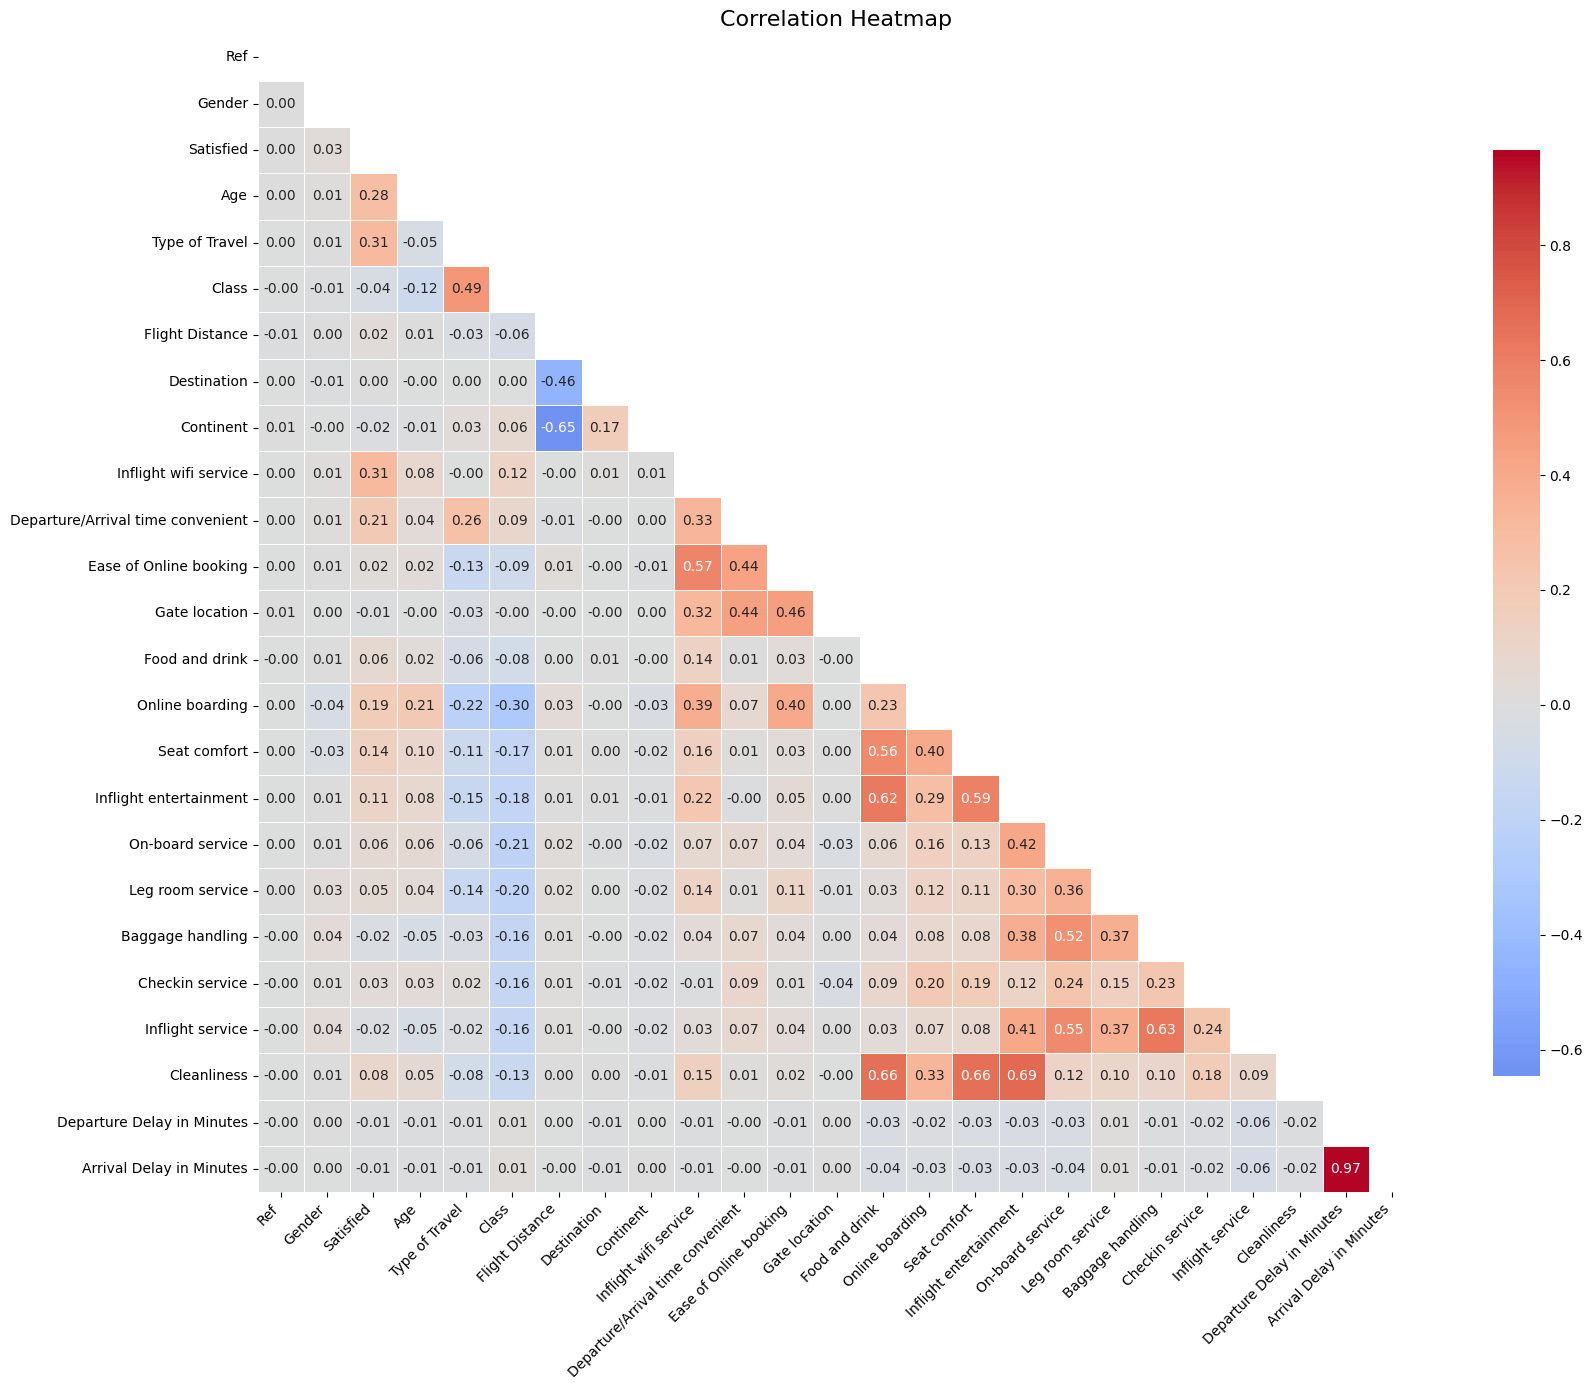

In [38]:
import numpy as np
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(18, 14))
# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

***Boxplot by Travel Class***

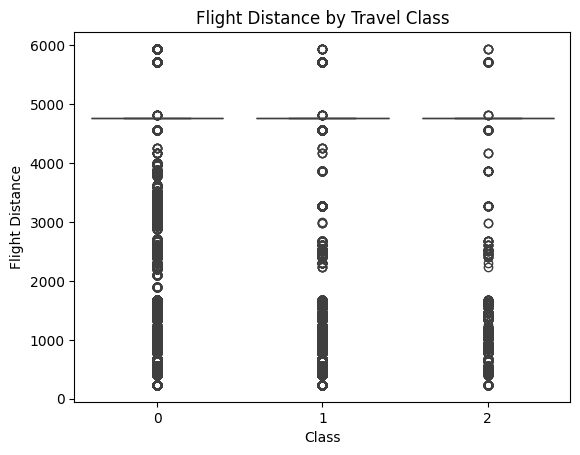

In [12]:
sns.boxplot(data=df, x='Class', y='Flight Distance')
plt.title('Flight Distance by Travel Class')
plt.show()

***Satisfaction by Class***

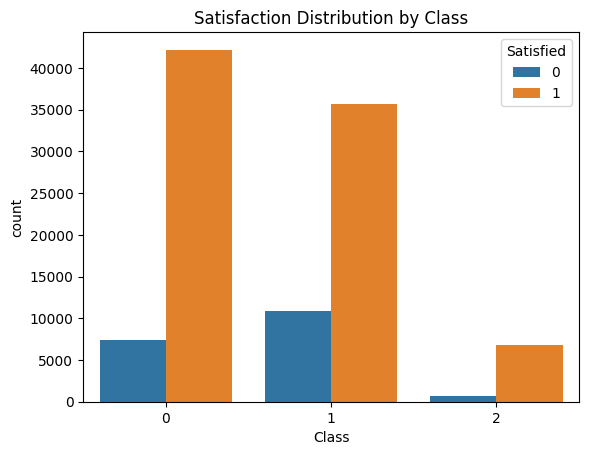

In [13]:
sns.countplot(data=df, x='Class', hue='Satisfied')
plt.title('Satisfaction Distribution by Class')
plt.show()

# Step 5.1: Modelling
---

**ML Models I'm Using:**

1. Logistic Regression
2. Decision Tree

***Pseudocode:***
1. Train Logistic Regression
2. Train Decision Tree
3. Evaluate with ROC-AUC, classification report, and cross-validation

***python libraries***

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Step 5.2: Model 1 : Logistic Regression

In [43]:
logreg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3736
           1       0.93      0.95      0.94     16983

    accuracy                           0.90     20719
   macro avg       0.84      0.81      0.83     20719
weighted avg       0.90      0.90      0.90     20719

ROC-AUC Score: 0.9422074801845554


***Confusion Matrix for Logistic Regression***

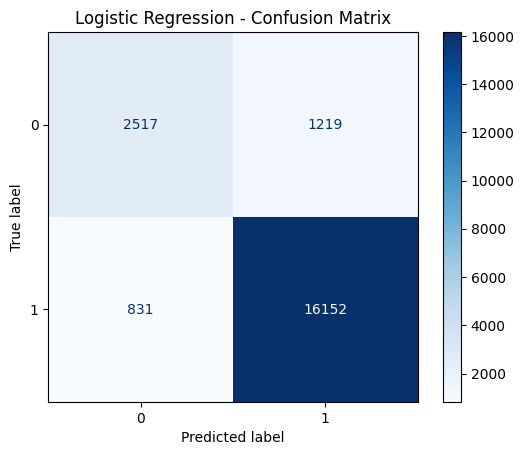

In [44]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

***ROC for Logistic Regression***

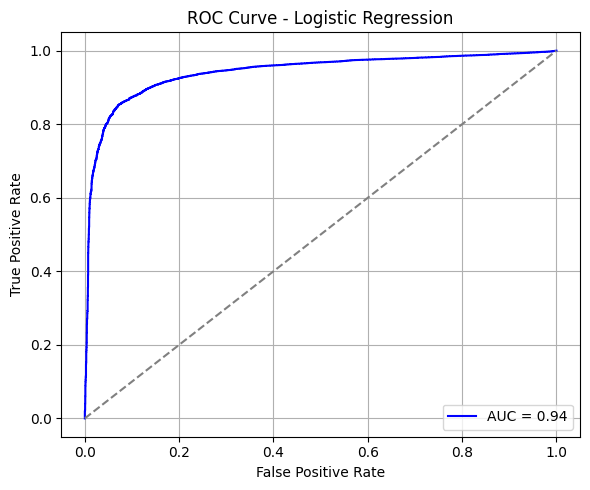

In [50]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)
auc_log = auc(fpr_log, tpr_log)
plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, color='blue', label=f'AUC = {auc_log:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 5.3: Model 2 : Decision Tree Classifier
---

***python libraries Needed***

In [45]:
from sklearn.tree import DecisionTreeClassifier

***Train and Results***

In [47]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
# Predictions
y_pred_tree = tree.predict(X_test_scaled)
y_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]
# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_tree))
print("Cross-Validation Accuracy:", cross_val_score(tree, X, y, cv=5).mean())

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3736
           1       0.99      0.99      0.99     16983

    accuracy                           0.98     20719
   macro avg       0.97      0.97      0.97     20719
weighted avg       0.98      0.98      0.98     20719

ROC-AUC Score: 0.9702894890103606
Cross-Validation Accuracy: 0.98184258110334


***Confusion Matrix - Decision Tree***

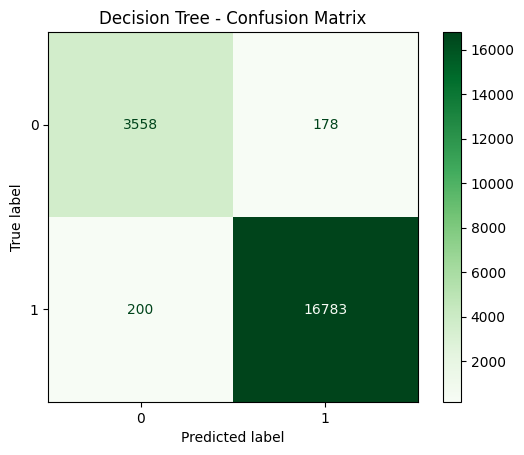

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

***ROC for Decision Tree***

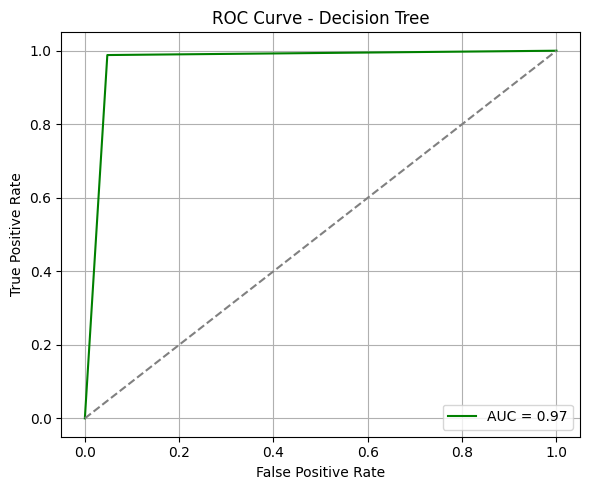

In [52]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
auc_tree = auc(fpr_tree, tpr_tree)
plt.figure(figsize=(6, 5))
plt.plot(fpr_tree, tpr_tree, color='green', label=f'AUC = {auc_tree:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6 :  Feature Importance Plot (Decision Tree)

<ipython-input-53-251b5a5de86a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='crest')


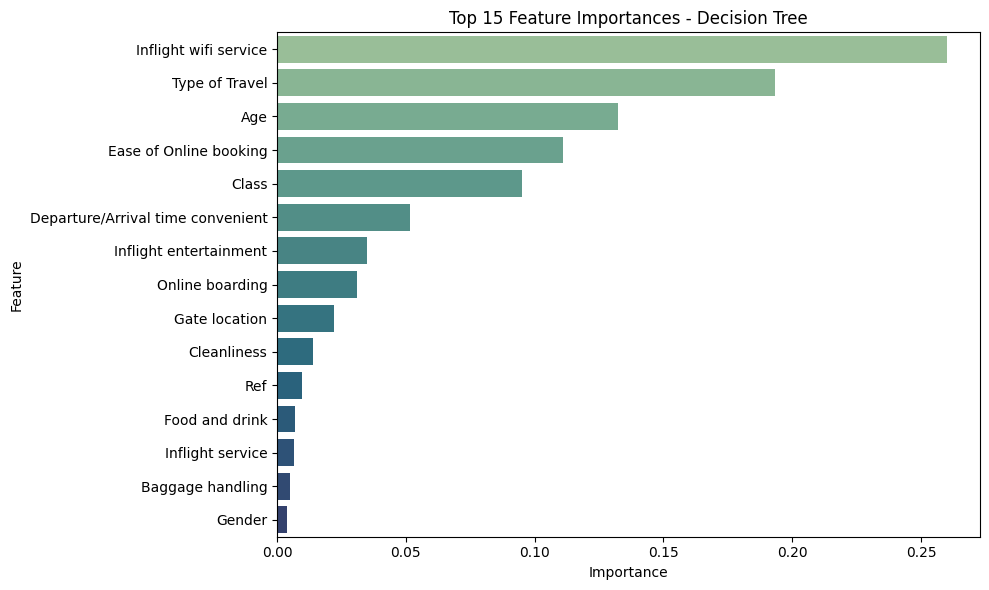

In [53]:
importance = tree.feature_importances_
features = X.columns
# DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='crest')
plt.title("Top 15 Feature Importances - Decision Tree")
plt.tight_layout()
plt.show()

# Step 7: Final Prediction for New Passenger

In [54]:
# Mock Passenger
sample = {
    'Ref': 123456,
    'Gender': label_encoders['Gender'].transform(['Male'])[0],
    'Age': 32,
    'Type of Travel': label_encoders['Type of Travel'].transform(['Business travel'])[0],
    'Class': label_encoders['Class'].transform(['Business'])[0],
    'Flight Distance': 1200,
    'Destination': label_encoders['Destination'].transform(['Germany'])[0],
    'Continent': label_encoders['Continent'].transform(['Europe'])[0],
    'Inflight wifi service': 4,
    'Departure/Arrival time convenient': 3,
    'Ease of Online booking': 3,
    'Gate location': 2,
    'Food and drink': 4,
    'Online boarding': 3,
    'Seat comfort': 4,
    'Inflight entertainment': 3,
    'On-board service': 4,
    'Leg room service': 3,
    'Baggage handling': 4,
    'Checkin service': 4,
    'Inflight service': 4,
    'Cleanliness': 4,
    'Departure Delay in Minutes': 5,
    'Arrival Delay in Minutes': 0
}

# Convert and scale
sample_df = pd.DataFrame([sample])[X.columns]
sample_scaled = scaler.transform(sample_df)

# Predictions
log_pred = logreg.predict(sample_scaled)[0]
tree_pred = tree.predict(sample_scaled)[0]

print(f"Logistic Regression Prediction: {'Satisfied' if log_pred == 1 else 'Unsatisfied'}")
print(f"Decision Tree Prediction: {'Satisfied' if tree_pred == 1 else 'Unsatisfied'}")


Logistic Regression Prediction: Satisfied
Decision Tree Prediction: Satisfied


# Final Summary: Decima Airways Passenger Satisfaction Analysis

## Objective
To analyze passenger satisfaction data from Decima Airways and build predictive models using **Logistic Regression** and **Decision Tree** to support strategic improvements in customer experience.

---

## Key Findings

### Logistic Regression Performance
- **Accuracy**: 90%
- **Precision (Class 1 - Satisfied)**: 93%
- **Recall (Class 1)**: 95%
- **ROC-AUC Score**: 0.942

Logistic Regression performed reasonably well with strong predictive power for satisfied customers. However, it struggled with lower recall and precision for dissatisfied passengers (Class 0).

### Decision Tree Performance
- **Accuracy**: 98%
- **Precision (Class 1 - Satisfied)**: 99%
- **Recall (Class 1)**: 99%
- **ROC-AUC Score**: 0.970
- **Cross-Validation Accuracy**: 98.18%

Decision Tree significantly outperformed Logistic Regression, offering higher overall accuracy and balanced precision/recall across both classes. It also showed excellent generalization through cross-validation.

---

## Visual Insights

- **ROC Curves** showed that both models perform well, with Decision Tree achieving a slightly higher area under the curve.
- **Feature Importance Plot** (from the Decision Tree) highlighted:
  - `Inflight service`
  - `Seat comfort`
  - `Food and drink`
  - `Online boarding`
  - `Cleanliness`
  as the **top features** impacting satisfaction.

---

## Recommendations

1. **Enhance Core Service Areas**  
   Invest in improving onboard services like comfort, cleanliness, and entertainment — these were highly influential in passenger satisfaction.

2. **Improve Experience for Economy Travelers**  
   Economy passengers showed lower satisfaction scores — prioritize upgrades in this segment.

3. **Optimize Digital Services**  
   Boost online boarding, booking convenience, and real-time updates to enhance digital engagement.

4. **Monitor Class 0 Precision**  
   Logistic Regression struggled with identifying dissatisfied passengers — business actions targeting churn should prioritize high-recall models like Decision Trees.

5. **Use Decision Tree in Production**  
   Given its high accuracy and interpretability via feature importance, the Decision Tree model is suitable for integration into dashboards and operational use.

---

## Conclusion

The **Decision Tree** model is the recommended choice for predicting passenger satisfaction due to its **superior performance, higher precision/recall, and interpretability**. Insights from the model can guide targeted service improvements, driving better customer experience and loyalty at Decima Airways.
